<a href="https://colab.research.google.com/github/ahmad001225/pnsite/blob/main/Copy_of_Copy_of_Untitled32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel(r'/content/fol1.xlsx')

In [ ]:
df

In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf

In [ ]:
#define the ticker symbol
tickerSymbol = 'CL=F'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
dataframe = tickerData.history(period='1d', start='2010-1-1', end='2022-1-1')

In [ ]:
dataframe

In [ ]:
pip install pytse_client

In [ ]:

# Download all the symbols and write them to CSV files
tickers = tse.download(symbols="all", write_to_csv=True)

# Choose a symbol to work with, for example "فولاد"
symbol = "فولاد"

# Get the ticker object for the symbol
ticker = tickers[symbol]

# Print some information about the ticker
print(f"Name: {ticker.name}")
print(f"Group name: {ticker.group_name}")
print(f"EPS: {ticker.eps}")
print(f"P/E: {ticker.pe}")

# Get the historical data as a pandas dataframe
df = ticker.history

# Print the first five rows of the dataframe
print(df.head())

# Plot the close price of the ticker
df["close"].plot()

In [ ]:
df= df.to_numpy()

In [ ]:
Close_folad= []
for i in range(len(df)-1):
  Close_folad.append(df[len(df)-i-1][1])
Close_folad

In [ ]:
Close_folad = pd.Series(Close_folad)

In [ ]:
shortEMA2 = Close_folad.ewm(span= 2, adjust=False).mean()
longEMA2 = Close_folad.ewm(span =35, adjust= False).mean()

In [ ]:
longMA = []
for i in range(len(Close_folad)-20):
  sum = 0
  for j in range(20):
    sum = sum + Close_folad[j+i]
  avg = sum/20
  longMA.append(avg)

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Price')

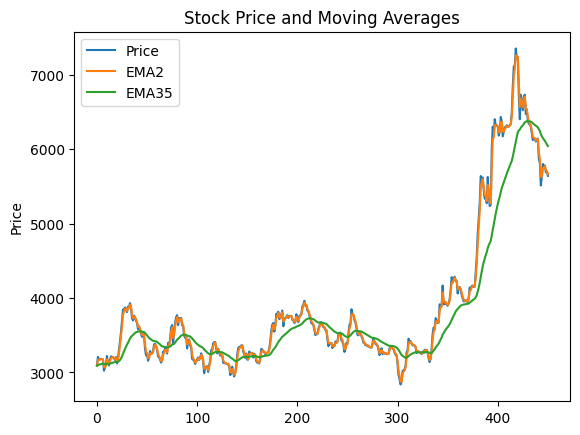

In [ ]:
plt.plot(Close_folad,label="Price")
plt.plot(shortEMA2,label="EMA2")
plt.plot(longEMA2,label="EMA35")
plt.legend()
plt.title("Stock Price and Moving Averages")
plt.ylabel("Price")

In [ ]:
import math

In [ ]:
from operator import pos
from numba import short
#EMA
postion = -1
c= -1
buy_n =[] #شماره روز خرید
buy_p = [] #قیمت خرید
buy_v= [] # تعداد خرید
buy_count =0
sell_n = [] # شماره روز فروش
sell_p =[] #قیمت فروش
sell_profit= [] #ُسود و زیان فروش
sell_count =0
deposit = 1000000000
for i in range(1,len(Close_folad)):
  if shortEMA2[i] > longEMA2[i] and shortEMA2[i-1] < longEMA2[i-1]:
    c=1
  elif shortEMA2[i] < longEMA2[i] and shortEMA2[i-1] > longEMA2[i-1]:
    c=-1
  if postion ==-1 and c==1:
     buy_n.append(i)
     buy_p.append(Close_folad[i])
     v= math.floor(deposit / Close_folad[i])
     deposit = deposit - (v * Close_folad[i])
     buy_v.append(v)
     buy_count = buy_count+1
     postion =1
  elif postion ==1 and c==-1:
     sell_n.append(i)
     sell_p.append(Close_folad[i])
     j=  Close_folad[i] * buy_v[buy_count - 1]
     deposit = deposit + j
     sell_profit.append((Close_folad[i] - buy_p[buy_count -1])*buy_v[buy_count - 1] )
     postion = -1
     sell_count = sell_count+1
  if deposit ==0 and postion==-1:
    break
if postion == 1:
  sell_n.append(len(Close_folad)-1)
  sell_p.append(Close_folad[len(Close_folad)-1])
  j=  Close_folad[len(Close_folad)-1] * buy_v[buy_count - 1]
  deposit = deposit + j
  sell_profit.append((Close_folad[len(Close_folad)-1] - buy_p[buy_count -1])*buy_v[buy_count - 1] )
  postion = -1
  sell_count = sell_count+1



In [ ]:
deposit

2002490167.539588

In [ ]:
count=0
for i in range(len(sell_profit)):
  if sell_profit[i] > 0:
    count = count+1
win_rate = (count / len(sell_profit)) * 100
win_rate

37.5

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
Max =0
for n in range(10,26):
  for t in range(1,10):
      shortEMA1= Close_folad.ewm(span= t, adjust=False).mean()
      longEMA1= Close_folad.ewm(span= n, adjust=False).mean()

      postion = -1
      c= -1
      buy_n =[] # شماره روز خرید
      buy_p =[] # قیمت خرید
      buy_v =[] # تعداد خرید
      buy_open = [] #تعداد سفارش باز
      buy_count=0
      sell_n =[] # شماره روز فروش
      sell_p =[] # قیمت فروش
      sell_profit =[] # سود و زیان فروش
      sell_count=0
      deposit = 1000000000
      asset =[]
      for i in range(1,len(Close_folad)):
        if shortEMA1[i] > longEMA1[i]:
          if shortEMA1[i-1] <= longEMA1[i-1]:
            c= 1
        elif shortEMA1[i] < longEMA1[i]:
          if shortEMA1[i-1] >= longEMA1[i-1]:
            c= -1
        if postion ==-1:
          if c==1:
            buy_n.append(i)
            buy_p.append(Close_folad[i])
            v= math.floor(deposit / Close_folad[i])
            deposit = deposit - (v * Close_folad[i])
            buy_v.append(v)
            buy_open.append(v)
            buy_count = buy_count+1
            postion =1
        elif postion == 1:
          if c==-1:
            sell_n.append(i)
            sell_p.append(Close_folad[i])
            j=  Close_folad[i] * buy_v[buy_count - 1]
            deposit = deposit + j
            sell_profit.append((Close_folad[i] - buy_p[buy_count -1])*buy_v[buy_count - 1] )
            postion = -1
            buy_open[buy_count -1] =0
            sell_count = sell_count+1
        if deposit ==0 and postion == -1:
          break
      if postion == 1:
        sell_n.append(len(Close_folad)-1)
        sell_p.append(Close_folad[len(Close_folad)-1])
        j=  Close_folad[len(Close_folad)-1] * buy_v[buy_count - 1]
        deposit = deposit + j
        sell_profit.append((Close_folad[len(Close_folad)-1] - buy_p[buy_count -1])*buy_v[buy_count - 1] )
        postion = -1
        sell_count = sell_count+1
        buy_open[buy_count -1] =0
      if deposit > Max:
        best_t = t
        best_n = n
        Max = deposit


In [ ]:
Max

2168480029.089117

In [ ]:
print(best_t,best_n)

1 12
